In [1]:
import lhapdf
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Getting a PDF member object
p_cteq6 = lhapdf.mkPDF("cteq6l1", 0)
p_cteq6 = lhapdf.mkPDF("cteq6l1/0")

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042


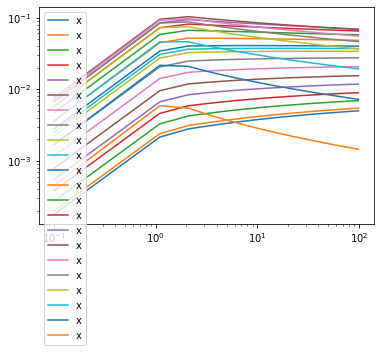

In [14]:
Q2_axis = np.arange(0.1,100,1)

x_axis = [0.008,0.009,0.0125,0.0175,0.025,0.035,0.05,0.07,0.09,0.1,0.11,0.14,0.18,0.225,0.275,0.35,0.45,0.5,0.55,0.65,0.75,0.85]

fig = plt.figure()
ax = fig.add_subplot()
for i in range(0,22):
    x = x_axis[i]
  
    y_F2x = []
    for Q2 in np.arange(0.1,100,1):
        Q = math.sqrt(Q2)
       
        y_dv=p_cteq6.xfxQ(1,x,Q)
        y_uv=p_cteq6.xfxQ(2,x,Q)
        y_dbar=p_cteq6.xfxQ(-1,x,Q)
        y_ubar=p_cteq6.xfxQ(-2,x,Q)
        y_s=p_cteq6.xfxQ(3,x,Q)
        y_sbar=p_cteq6.xfxQ(-3,x,Q)
        y_F2x.append(x*(4/9)*(y_uv+y_ubar)+x*(1/9)*(y_dv+y_dbar)+x*(1/9)*(y_s+y_sbar))
   
    F2x=np.asarray(y_F2x)
    
    plt.plot(Q2_axis,F2x,label = "x")
ax.set_xscale("log")
ax.set_yscale("log")
plt.legend()